# Clustering Analysis of Hearthstone Cards - visualizations
This section uses dimensionality reduction techniques such as Principal Component Analysis (PCA) and T-distributed Stochastic Neighbor Embedding (TSNE) to attempt to visualize where each card is relative to one another.

----

## Introduction
**Dimensionality reduction techniques used**
- **Principal Component Analysis (PCA)**  
PCA is a dimensionality deruction technique that decomposes a multi-dimensional matrix of features into a number of arbitary axes which explain the largest portion of the samples' variance. For visualizations, PCA is generally used to decompose the features into 2 dimensions and the samples are then plotted using this 2-dimensional coordinate system.  
- **T-distributed Stochastic Neighbor Embedding (TSNE)**  
On the other hand, TSNE uses probability distributions to express similarities between two points. It does so in such a way that if two points, A and B, were similar, given that point A is selected, point B then has a high probability of being chosen as a neighbor. TSNE then finds the positions of the points in a 2-dimensional space that minimizes the differences between the probability distributions among the pairs.

----

### Importing packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## Loading data
The processed data has already been generated and saved in the notebook `hs-package-kmeans.ipynb`. Reading the CSV file `cards-decks.csv`

In [2]:
# reading the csv file, using the first column as index
cards_features = pd.read_csv("./cards-decks.csv", index_col=0)
cards_features.head()

,137,1690,2414,3527,3992,4592,4965,5269,5327,5358,...,325935,325937,326209,330402,331034,334031,335601,336843,345826,346203
name,,,,,,,,,,,,,,,,,,,,,
Oasis Snapjaw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Shadow Word: Death,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Silent Knight,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Unlicensed Apothecary,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Shadow Madness,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# saving the dataframe as numpy array
cards_features_array = np.array(cards_features)

## Performing PCA (2 dimensions)
Reducing the dimensions of the data from 1296 dimensions to 2 most important arbitary dimensions.

In [4]:
pca = PCA(n_components=2)
cards_features_array_pca = pca.fit_transform(cards_features_array)

print("Variance explained by the top 2 axes: %0.3f, %0.3f" % tuple(pca.explained_variance_ratio_))

Variance explained by the top 2 axes: 0.071, 0.054


The two axes calcualted by PCA are able to explain 7.1% andd 5.4% of the variace.

In [5]:
cards_features_array_pca_df = pd.DataFrame(cards_features_array_pca, columns = ['component 1', 'component 2'], index=cards_features.index)
cards_features_array_pca_df.head()

,component 1,component 2
name,,
Oasis Snapjaw,-0.874302,-0.594298
Shadow Word: Death,0.549870,2.103233
Silent Knight,-0.652881,-0.541119
Unlicensed Apothecary,-0.829450,-0.517630
Shadow Madness,-0.797093,-0.321547


## Performing TSNE (2 dimensions)
Using TSNE to reduce the dimension of the dataset to 2 dimensions.

In [6]:
cards_features_array_tsne = TSNE(n_components=2).fit_transform(cards_features_array)

In [9]:
cards_features_array_tsne_df = pd.DataFrame(cards_features_array_tsne, columns = ['component 1', 'component 2'], index=cards_features.index)
cards_features_array_tsne_df.head()

,component 1,component 2
name,,
Oasis Snapjaw,8.613791,16.201551
Shadow Word: Death,-26.671167,5.791445
Silent Knight,14.600719,-16.859428
Unlicensed Apothecary,-33.014355,-5.280866
Shadow Madness,7.319180,3.029221


## Plotting the PCA/TSNE data

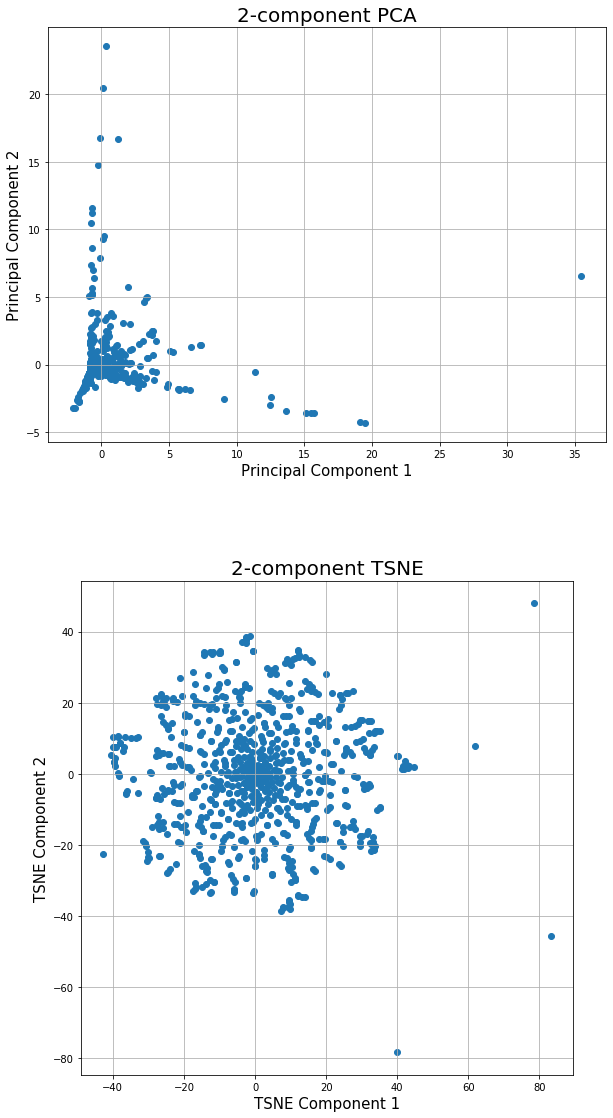

In [17]:
# plotting a simple scatterplot without and color partitining.
fig = plt.figure(figsize=(10, 20))

ax1 = plt.subplot(2, 1, 1)
ax1.set_xlabel('Principal Component 1', fontsize=15)
ax1.set_ylabel('Principal Component 2', fontsize=15)
ax1.set_title('2-component PCA', fontsize=20)
ax1.scatter(cards_features_array_pca_df['component 1'], cards_features_array_pca_df['component 2'])
ax1.grid()
ax1.set(aspect='equal')

ax2 = plt.subplot(2, 1, 2)
ax2.set_xlabel('TSNE Component 1', fontsize=15)
ax2.set_ylabel('TSNE Component 2', fontsize=15)
ax2.set_title('2-component TSNE', fontsize=20)
ax2.scatter(cards_features_array_tsne_df['component 1'], cards_features_array_tsne_df['component 2'])
ax2.grid()
ax2.set(aspect='equal')

plt.savefig("cluster-nopartition.jpg");

### Discussion
Both plots show one major cluster. Given this, some partitioning is needed to further make sense of the cards distribution.